In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV,ParameterGrid,train_test_split,validation_curve,learning_curve
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold

In [7]:
x_train = pd.read_csv('data_source/X_train.csv')
y_train = pd.read_csv('data_source/y_train.csv')

x_test = pd.read_csv('data_source/X_test.csv')
y_test = pd.read_csv('data_source/y_test.csv')

x_train_robust = x_train.copy()
y_train_robust = y_train.copy()

x_test_robust = x_test.copy()
y_test_robust = y_test.copy()

x_train_robust = x_train_robust.loc[:,['Destination Port', 'NAT Source Port','Packets', 'Elapsed Time (sec)','Bytes Received','NAT Destination Port']]
y_train_robust = y_train_robust.loc[:,'Action']
x_test_robust = x_test_robust.loc[:,['Destination Port', 'NAT Source Port','Packets', 'Elapsed Time (sec)','Bytes Received','NAT Destination Port']]
y_test_robust = y_test_robust.loc[:,'Action']

#### Create Pipeline

In [8]:
pipe = Pipeline(steps=[
    ('scaler', RobustScaler()),
    ('classifier', XGBClassifier()) # object='multi:softmax',num_class=4,seed=42,eval_metric='merror'
])

#### Parameter for XG Boost Classification

In [9]:
max_dept = list(np.arange(1,11))
parameters = [{'classifier__object':['multi:softmax'],'classifier__num_class':[4],'classifier__eval_metric':['merror','logloss'],'classifier__learning_rate':[0.1],'classifier__max_depth':max_dept},
              {'classifier__object':['multi:softprob'],'classifier__num_class':[4],'classifier__eval_metric':['merror','logloss','auc','aucpr'],'classifier__learning_rate':[0.1],'classifier__learning_rate':max_dept}

]

#### Grid Search CV

In [10]:
grid = GridSearchCV(pipe,parameters,cv=5)
grid.fit(x_train_robust, y_train_robust)
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

[21:50:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[21:50:37] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[21:50:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[21:50:40] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[21:50:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[21:50:42] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpytho

#### Set New Parameter

In [11]:
pipe.set_params(classifier__eval_metric = 'merror', classifier__learning_rate = 1, classifier__num_class= 4, classifier__object= 'multi:softprob')
# classifier__eval_metric = 'merror', classifier__learning_rate = 1, classifier__num_class= 4, classifier__object= 'multi:softprob'

Pipeline(steps=[('scaler', RobustScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='merror',
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_class=4, num_parallel_tree=None,
                               object='multi:softprob', ...))])

#### Plotting Learning Curve

In [12]:
train_sizes, train_scores, test_scores = learning_curve(pipe, x_train_robust, y_train_robust, cv=5,scoring='f1_macro')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

[22:00:33] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[22:00:33] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[22:00:33] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[22:00:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[22:00:37] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[22:00:40] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpytho

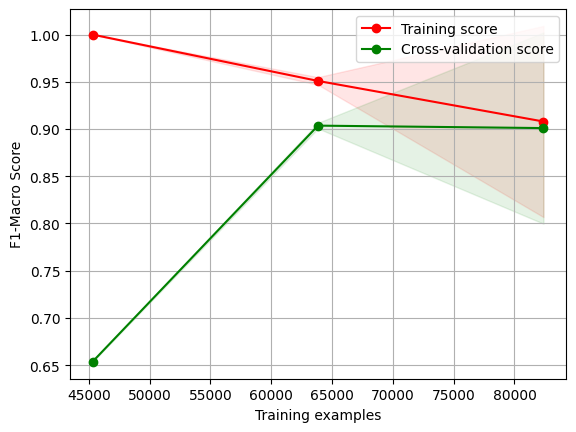

In [13]:
plt.figure()
plt.xlabel("Training examples")
plt.ylabel("F1-Macro Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1,
                    color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
            label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
            label="Cross-validation score")

plt.legend(loc="best")

In [14]:
pipe.fit(x_train_robust, y_train_robust)

print('Training set score: ' + str(pipe.score(x_train_robust,y_train_robust)))
print('Test set score: ' + str(pipe.score(x_test_robust,y_test_robust)))

[22:01:03] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

Training set score: 0.9589062378621922
Test set score: 0.9862156663275686


#### Final Train - Test Model

In [15]:
pipe.fit(x_train_robust, y_train_robust)

train_yhat = pipe.predict(x_train_robust)
train_pipe = pipe.score(x_train_robust,y_train_robust)

test_yhat = pipe.predict(x_test_robust)
test_pipe = pipe.score(x_test_robust,y_test_robust)
print('Train Score\n',classification_report(y_train_robust,train_yhat))
print('Test Score\n',classification_report(y_test_robust, test_yhat))
print(f"AVG F1-Score Train: {train_pipe}\nAVG F1-Score Test: {test_pipe}")

[22:01:07] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

Train Score
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25830
           1       0.93      0.90      0.91     25165
           2       1.00      1.00      1.00     26245
           3       0.91      0.93      0.92     25744

    accuracy                           0.96    102984
   macro avg       0.96      0.96      0.96    102984
weighted avg       0.96      0.96      0.96    102984

Test Score
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11292
           1       1.00      0.94      0.97      4496
           2       1.00      1.00      1.00      3856
           3       0.06      0.94      0.11        16

    accuracy                           0.99     19660
   macro avg       0.76      0.97  